In [1]:
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
import neurokit2 as nk
import numpy as np
import seaborn as sns
# import umap
# import umap.plot
from glob import glob
import pickle

In [2]:
plt.style.use("science")
fpath = "C:/Users/Marek/OneDrive/School/DP/masters-thesis/assets/figures"
plt.rcParams["font.family"] = ["Latin Modern Roman"]

In [4]:
with open("../data/Merged/WESAD_merged_5s.pkl", "rb") as file:
    wesad_labels = pickle.load(file, encoding="latin1")
wesad_labels = wesad_labels["model_label"]

with open("../data/Merged/CLAS_merged_5s.pkl", "rb") as file:
    clas_labels = pickle.load(file, encoding="latin1")
clas_labels = clas_labels["label"]
clas_labels[clas_labels == 1] = 10
clas_labels[clas_labels == 3] = 1
clas_labels[clas_labels == 6] = 1
clas_labels[clas_labels == 8] = 1
idx = clas_labels.isin([0, 1])
clas_labels = clas_labels[idx]

In [6]:
with open("../data/GADF_Data/GADF_WESAD_merged_5s.pkl", "rb") as file:
    wesad = pickle.load(file, encoding="latin1")

with open("../data/GADF_Data/GADF_CLAS_merged_5s.pkl", "rb") as file:
    clas = pickle.load(file, encoding="latin1")
    clas = clas[idx]

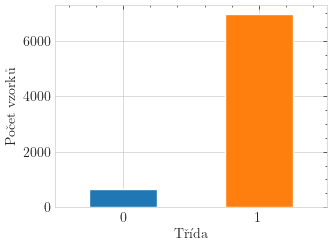

In [10]:
clas_labels.value_counts()[[0, 1]].plot(kind="bar", color=["#1f77b4", "#ff7f0e"])
plt.xticks(rotation = 0)
plt.xlabel("Třída")
plt.ylabel("Počet vzorků")
plt.savefig(f"{fpath}/clas_labels.pdf", format="pdf", bbox_inches="tight")

In [46]:
df = []
for i in wesad[:, :, :, 0]:
    df.append(i.flatten())

In [47]:
df = pd.DataFrame(df)
df["Label"] = wesad_labels

In [150]:
embedding2d = umap.UMAP(n_components=2).fit_transform(df)
embedding3d = umap.UMAP(n_components=3).fit_transform(df)

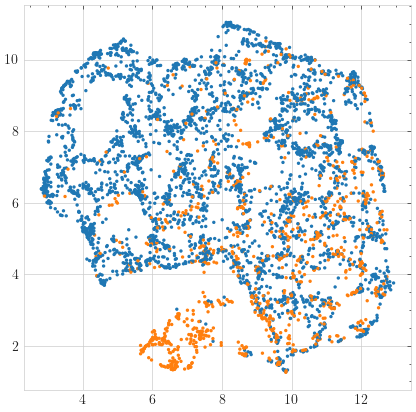

In [151]:
colors = {0: "#1f77b4", 1: "#ff7f0e"}
plt.figure(figsize=(5, 5))
plt.scatter(embedding2d[:, 0], embedding2d[:, 1], c=df["Label"].map(colors), s=2)
# plt.savefig(f"{fpath}/wesad_umap.pdf", format="pdf", bbox_inches="tight")

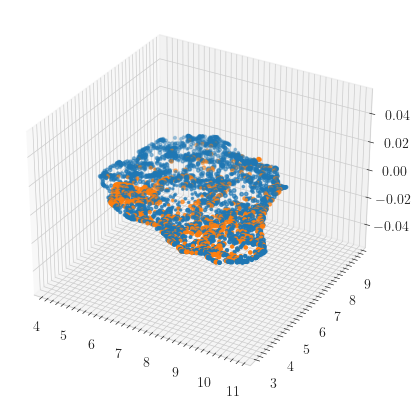

In [152]:
plt.figure(figsize=(5, 5))
plt.axes(projection="3d")
plt.scatter(embedding3d[:, 0], embedding3d[:, 1], embedding3d[:, 2], c=df["Label"].map(colors))
# plt.savefig(f"{fpath}/clas_umap.pdf", format="pdf", bbox_inches="tight")